In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score

In [3]:
# sample data for 'StandardScaler'
data = np.array([[1.0, 2.0], [3.0, 6.0], [5.0, 10.0]])

# create a scaler instance
scaler = StandardScaler()

# fit and transform the data
scaled_data = scaler.fit_transform(data)

print(scaled_data)

[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


### Importing Dataset 🔗

In [4]:
df = pd.read_csv(r'C:\Users\boney\NIT All Projects\Personally tried P\Stock Price Prediction\tesla.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [6]:
df.shape

(1692, 7)

In [7]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


### Exploratory Data Analysis 🎯

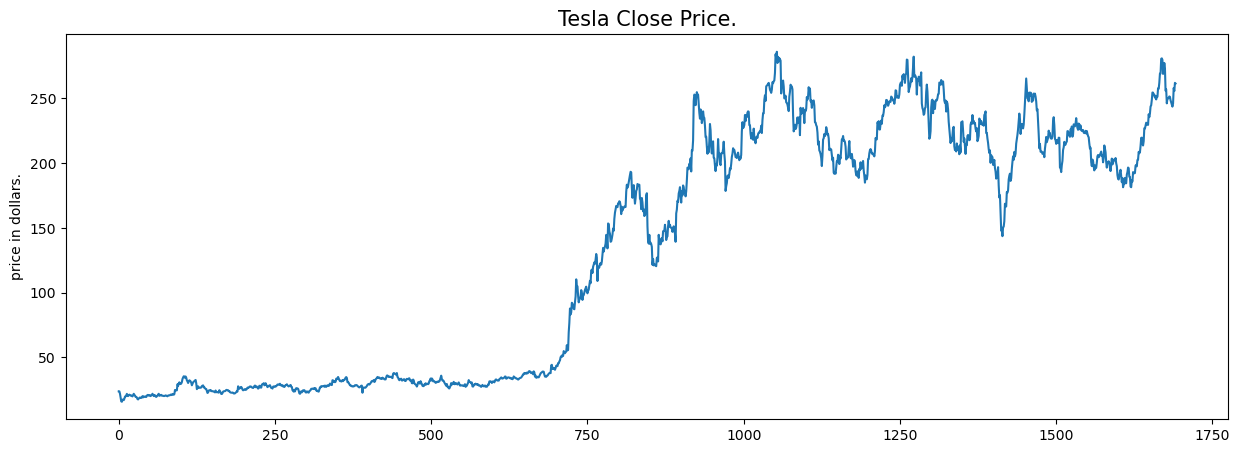

In [9]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close Price.', fontsize= 15)
plt.ylabel('price in dollars.')
plt.show()

In [10]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


- data in "Close" and "Adj Close" are same, let's check if all rows and columns have the same condition

In [11]:
df[df['Close'] == df['Adj Close']].shape

(1692, 7)

- so both the col and rows have same data, for no further confusion drop the col

In [12]:
df = df.drop(['Adj Close'], axis = 1)

In [13]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

- so from above we can conclude that ther is no null values

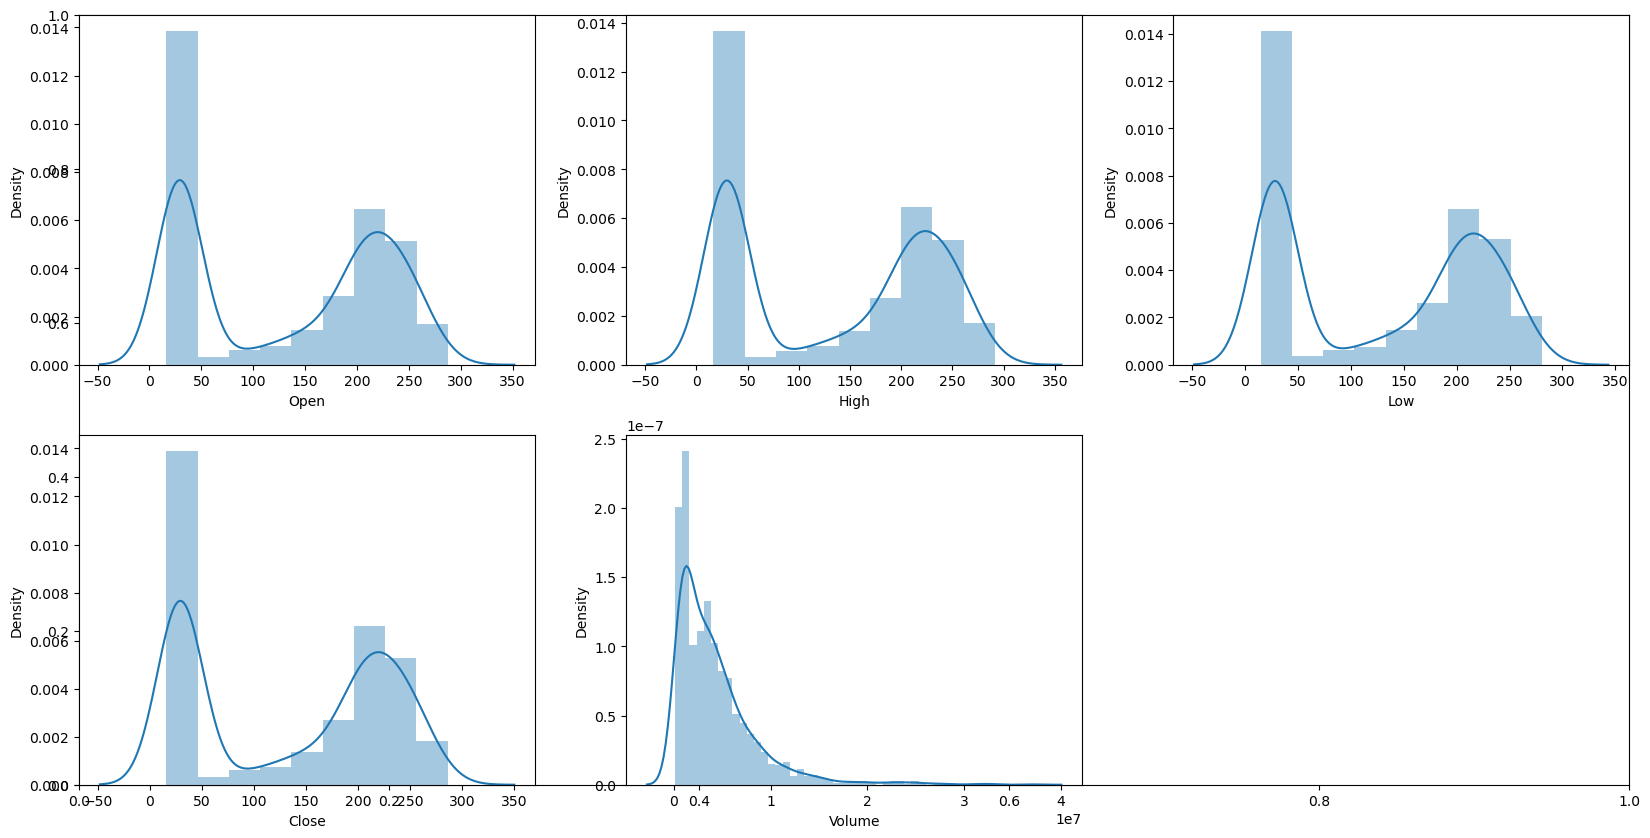

In [14]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sn.distplot(df[col])
plt.show()

- In the distribution plots for the feature data (O,H,L,C), you can see two peaks, which suggests that the values tend to vary a lot around two different ranges.
- the "Volume" data, it's left-skewed, meaning most of the values are higher, with a few lower ones pulling the curve to the left.

- sn.distplot() is deprecated in newer versions of Seaborn. Use sn.histplot() and sn.kdeplot()
- It combines a histogram and a kernel density estimate (KDE) to visualize the data distribution.

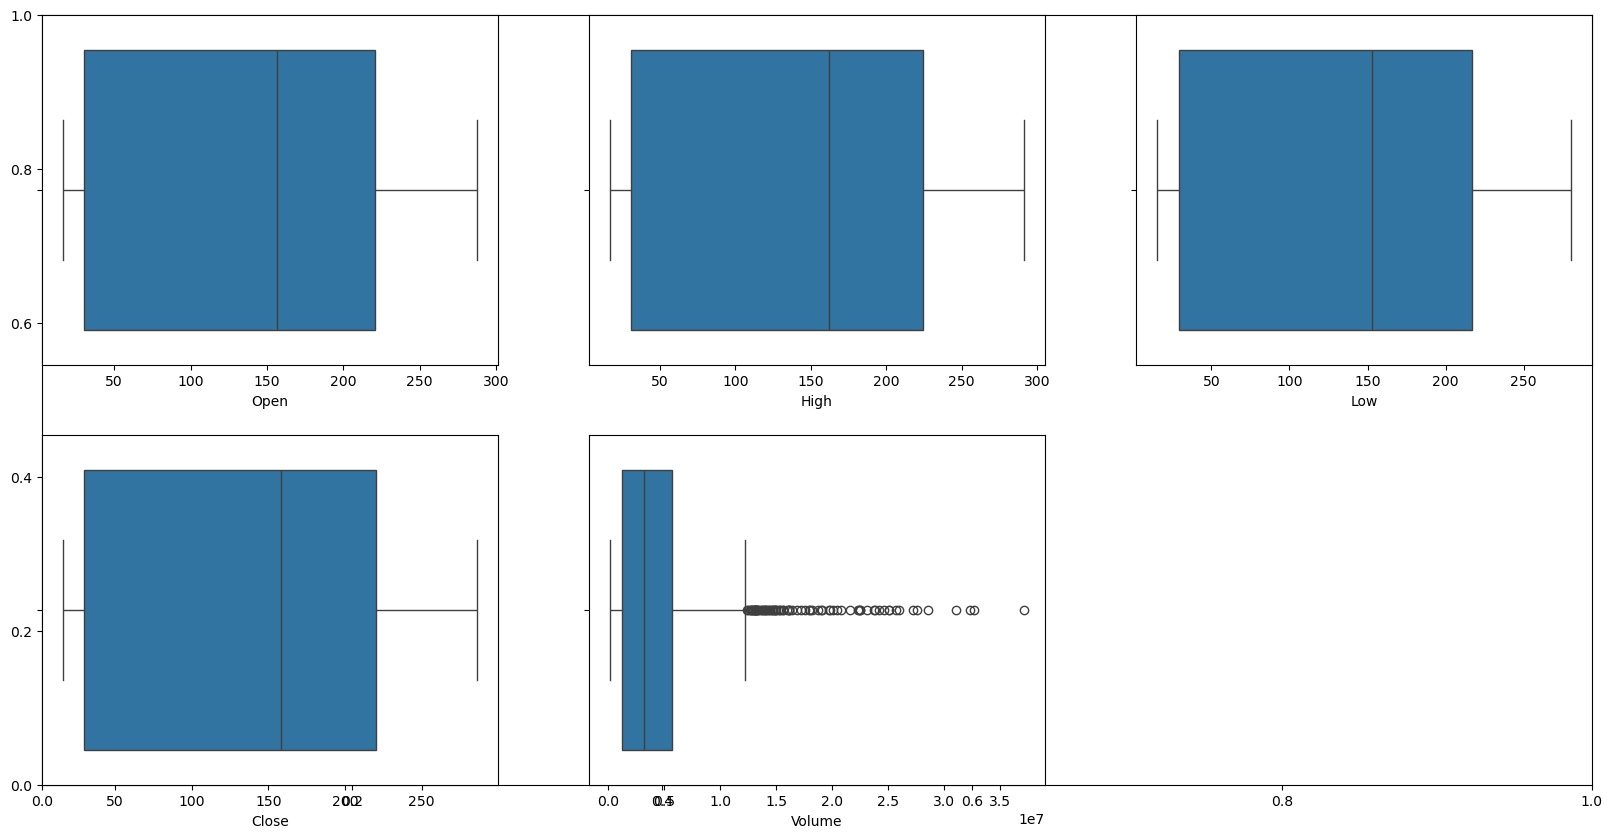

In [15]:
plt.subplots(figsize = (20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sn.boxplot(x=df[col]) # x,y are axis, simply to say this help to place the plot in horiziontal or veritcal
plt.show()

- from above boxplot we can say that only "Volume" data contains outliers, any rest of them have no outliers.

### Features Engineering 👀
- Defination : Feature Engineering helps to derive some valuable features from the existing ones. These extra features help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.

In [16]:
splitted = df['Date'].str.split('/', expand = True)
df['day'] = splitted[1].astype('int')  # creating new col
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [17]:
df['quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,quarter_end
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


- df['month'] % 3 == 0: This checks whether the month is divisible by 3 (i.e., March, June, September, December). These are the end of calendar quarters.
- every company prepares its quarterly results and publishes them publicly so that people can analyze the company's performance.
-  these results affect the stock price heavily, thats why this feature is helpful for the learning model.

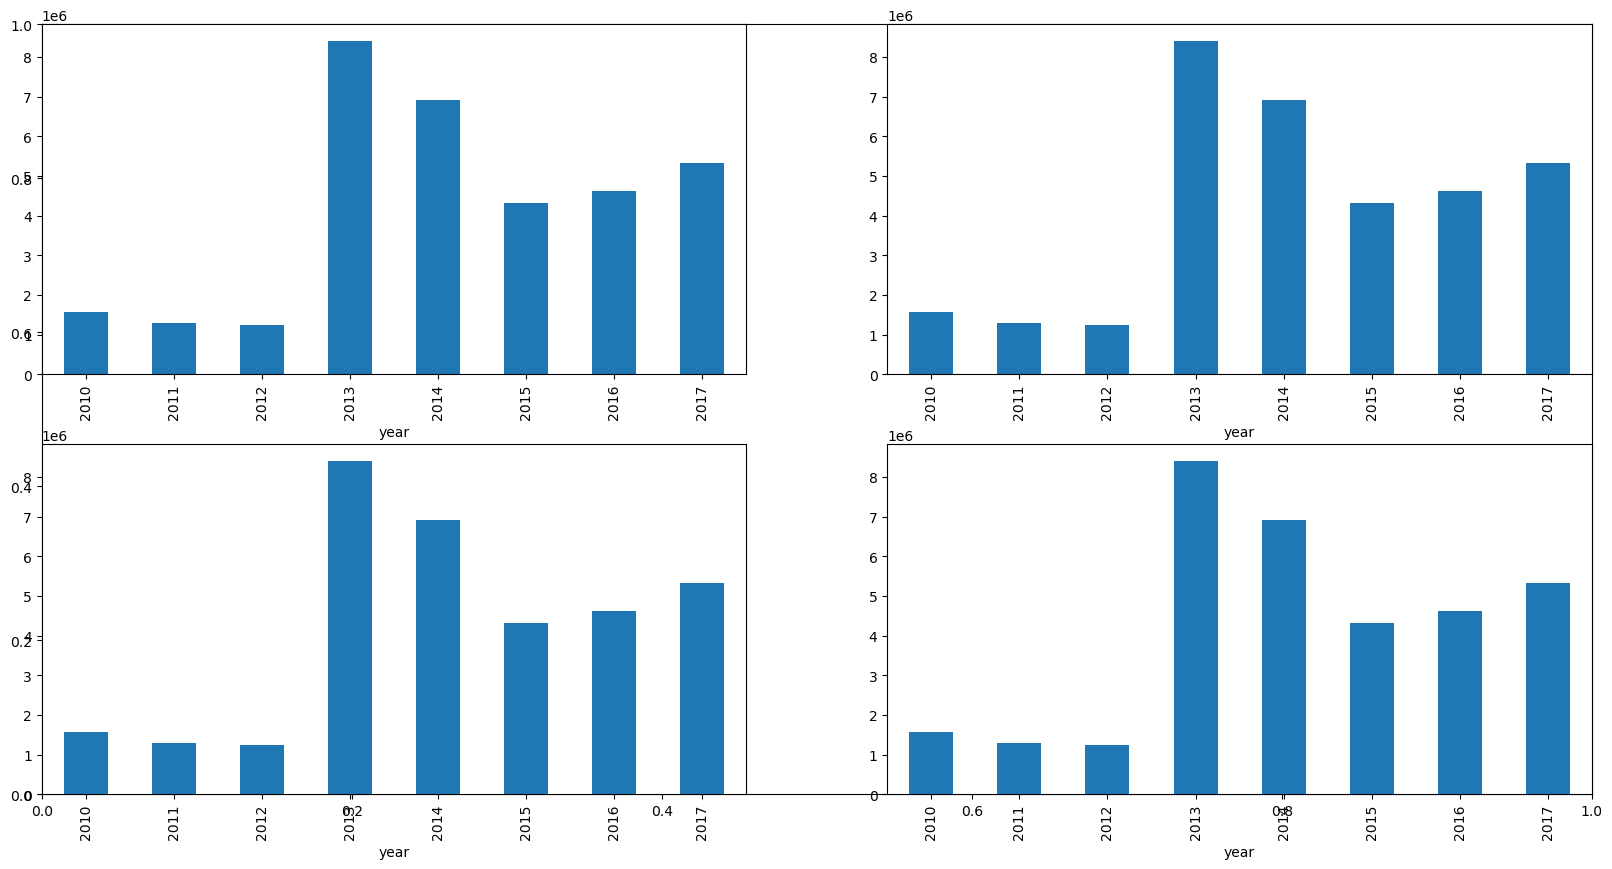

In [18]:
# remove the 'Date' column and group the data by 'year', then take the average
yearly_grouped_data = df.drop('Date', axis=1).groupby('year').mean()

# set the figure size
plt.subplots(figsize = (20,10))

# list of columns to plot
cols_to_plot = ['Open','High', 'Low','Close']

# loop through each column and create a subplot
for i,column in enumerate(cols_to_plot):
    plt.subplot(2,2,i+1)
    yearly_grouped_data[col].plot.bar()
plt.show()

- stock prices have doubled from 2013 to that in 2014

In [19]:
df.drop('Date', axis = 1).groupby('quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
quarter_end,,,,,,,,
0,130.813739,133.182620,128.257229,130.797709,4.461581e+06,15.686501,6.141208,2013.353464
1,135.679982,137.927032,133.455777,135.673269,3.891084e+06,15.657244,7.584806,2013.314488


- As we see prices are higher inthe month which are quarter end, but the voulume of trade is low

In [20]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

-  the target feature which is a signal whether to buy or not we will train our model to predict this only.
-  But before proceeding, check whether the target is balanced or not using a pie chart.

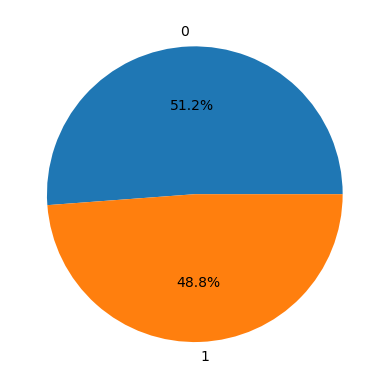

In [21]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

- ensuring that there are no highly correlated features as they do not help in the learning process of the algorithm. 

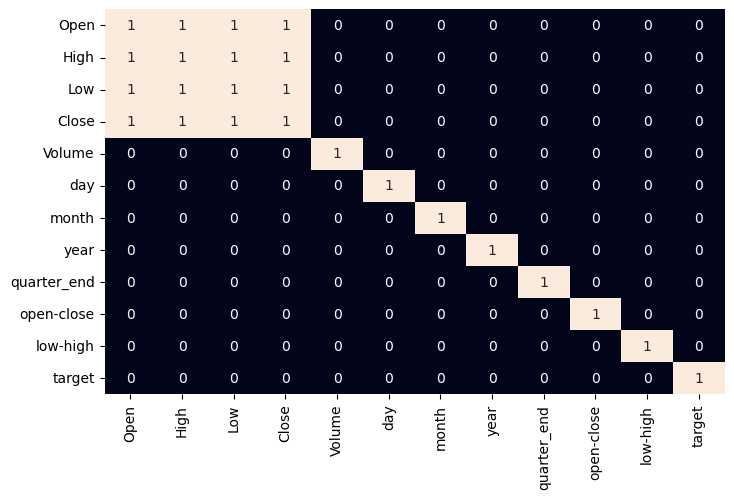

In [22]:
plt.figure(figsize = (8,5))
sn.heatmap(df.drop('Date', axis=1).corr() >0.9, annot = True, cbar = False)
plt.show()

- The heatmap shows that OHLC values are strongly correlated.
- The new features don’t have strong correlations with each other or with the original ones, so we’re good to go ahead and build the model.

### Data Splittingand Normalization

In [23]:
features = df[['open-close', 'low-high', 'quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, Y_train, Y_test = train_test_split(
    features, target, test_size=0.1, random_state = 2025)
print(X_train.shape, X_test.shape)

(1522, 3) (170, 3)


In [24]:
models = [
    LogisticRegression(),
    SVC(kernel='poly', probability=True),
    XGBClassifier(),
    RandomForestClassifier(n_estimators=100)
]

In [25]:
for i in range(4):
    models[i].fit(X_train, Y_train)

    train_probs = models[i].predict_proba(X_train)[:, 1]
    test_probs = models[i].predict_proba(X_test)[:, 1]

    train_preds = models[i].predict(X_train)
    test_preds = models[i].predict(X_test)

    print(f'{models[i]}:')
    print('Training ROC AUC:', metrics.roc_auc_score(Y_train, train_probs))
    print('Testing ROC AUC:', metrics.roc_auc_score(Y_test, test_probs))

    # Use true test labels and predicted test labels here
    f1 = f1_score(Y_test, test_preds)
    print('Testing F1 Score:', f1)
    print()

LogisticRegression():
Training ROC AUC: 0.5203538599765015
Testing ROC AUC: 0.5150885935769656
Testing F1 Score: 0.6577777777777778

SVC(kernel='poly', probability=True):
Training ROC AUC: 0.4797377151150737
Testing ROC AUC: 0.4590254706533776
Testing F1 Score: 0.671875

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=

##### Overfitting
- Definition: The model learns the training data too well, including noise and outliers. It performs well on training data but poorly on test data.
- Symptoms: High training accuracy, Low test accuracy
- Causes: Model is too complex (too many parameters or deep layers), Not enough training data, Too many training epochs
- Solutions: Simplify the model (reduce layers, parameters), Use regularization (L1, L2), Use dropout (in neural nets), Get more training data, Use early stopping.

##### Underfitting
- Definition: The model is too simple to capture the underlying pattern in the data. It performs poorly on both training and test data.
- Symptoms: Low training accuracy, Low test accuracy
- Causes: Model is too simple (e.g., linear model for nonlinear data), Too few training epochs, Features not informative enough
- Solutions: Use a more complex model, Train longer, Feature engineering, Reduce regularization

- above model has high training accuracy and low test accuracy --> Overfitting in both RFC and XGB

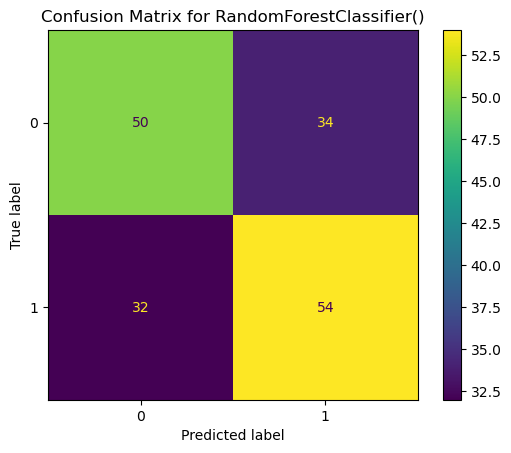

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay.from_estimator(models[i], X_test, Y_test)
cm.ax_.set_title(f'Confusion Matrix for {models[i]}')
plt.show()

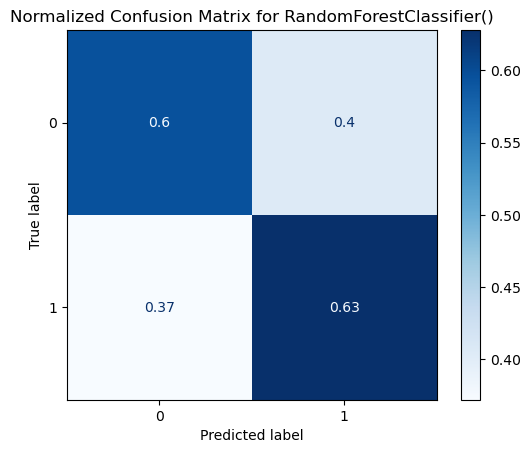

In [28]:
cm1 = ConfusionMatrixDisplay.from_estimator(
    models[i],
    X_test,
    Y_test,
    cmap='Blues',           # Color scheme
    normalize='true'        # Normalize by row 
)
cm1.ax_.set_title(f"Normalized Confusion Matrix for {models[i]}")
plt.show()


##### Conclusion:
We can observe that the accuracy achieved by the state-of-the-art ML model is no better than simply guessing with a probability of 50%. Possible reasons for this may be the lack of data or using a very simple model to perform such a complex task as Stock Market prediction.